# **Análise Estatística de Dados de Casas para Alugar**

# 1. Apresentação



### Resumo
Este documento tem o objetivo de apresentar uma análise estatística sobre um dataset (conjunto de dados) de aluguel de residências de alguns estados da região sudeste e centro-oeste.



### Autores
Alunos de pós-graduação em Ciência de Dados da Universidade do Estado do Amazonas:
1.   [Patrick Tapajós Pinto](https://www.linkedin.com/in/patrick-tapajos-pinto/)
2.   [Wladimir Barroso Guedes de Araújo Neto](https://www.linkedin.com/in/wladneto/)


### Ferramentas Utilizadas
Esta análise foi efetuada utilizando-se a linguagem de programação **Python** e suas bibliotecas:
-  **Pandas**, para carregamento e processamento de dados;
- **NumPy**, **Scipy**, **StatsModels** e **Statistics**, para análise algébrica e estatística; e
- **Matplotlib** e **Seaborn**, para visualização de dados.

# 2.  Importação dos Dados

Para armazenar os arquivos baixados, se faz necessário montar um diretório no Google Drive.

In [ ]:
# Montagem do drive, para acesso aos arquivos baixados
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Os dados foram obtidos no Kaggle, uma rede social do cientistas de dados :).

Para baixar os dados do kaggle, é necessário ter uma conta. Caso não tenha, você pode acessar https://www.kaggle.com e criar.

Após isso, basta acessar seus dados e gerar uma API Key.

1. Acesse sua conta no kaggle;
2. Clique na sua foto, no canto superior direito, para visualizar um menu como o apresentado na imagem abaixo: 

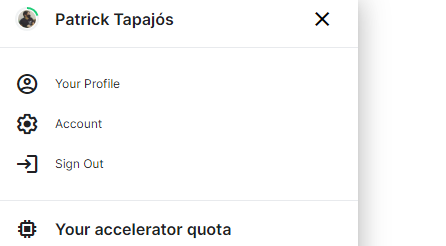

3. Clique em Account;
4. Vá até o Tópico "API" e clique em "Create New API Token". A imagem a seguir apresenta o tópico e o botão:

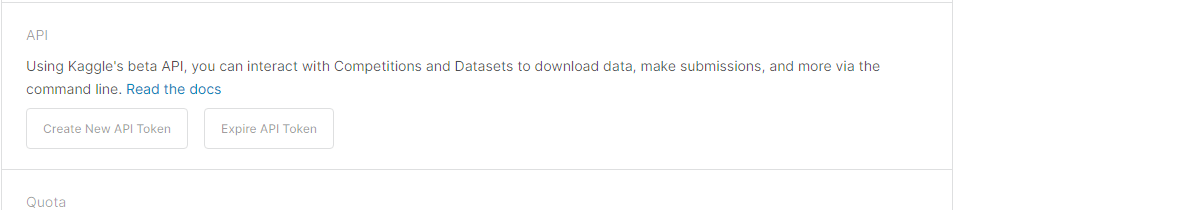

5. Baixe o arquivo;
6. Faça o upload deste arquivo para o seu Drive no Google.

In [ ]:
# Download da base de dados no armazenando na sessão do colab
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive"
!kaggle datasets download -d rubenssjr/brasilian-houses-to-rent
!unzip \*.zip  && rm *.zip

  0% 0.00/282k [00:00<?, ?B/s]
100% 282k/282k [00:00<00:00, 42.1MB/s]
Archive:  brasilian-houses-to-rent.zip
  inflating: houses_to_rent.csv      
  inflating: houses_to_rent_v2.csv   


# 3. Importação de Bibliotecas

In [ ]:
import pandas as pd
import numpy as np

import statistics as st
import statsmodels.stats.proportion as prop
from scipy import stats
from scipy.stats import binom, nbinom, poisson, uniform, expon, norm , t
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 4. Criação do dataset

In [ ]:
# Criando dataframe a apartir do arquivo csv baixado.

# Caso utilize o Google Drive, utilize
df_houses = pd.read_csv('/content/houses_to_rent_v2.csv', decimal=',')

# Caso contrário, utilize:
#df_houses = pd.read_csv('houses_to_rent_v2.csv', decimal=',')
df_houses.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [ ]:
#!pip install pandas-profiling==2.7.1
#from pandas_profiling import ProfileReport
#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

# 5. Análise

a) (Vale 1,0 ponto) Construir tabelas e gráficos apropriados para cada variável do data frame;

b) (Vale 1,0 ponto) Calcular a média, mediana, moda, desvio-padrão, coeficiente de variação e simetria das variáveis quantitativas;

c) (Vale 1,0 ponto) Analisar a normalidade dos dados numéricos e se existe a presença de outliers;

d) (Vale 1,0 ponto) Comparar as variáveis quantitativas e descrever qual é mais homogênea;

e) (Vale 1,0 ponto) Calcular os respectivos Intervalos de Confiança ao nível de 95% para cada campo do data frame;

f) (Vale 1,0 ponto) Comparar a média de um campo numérico em relação a um campo
categórico e responder se existe diferença estatística ao nível de 5% de significância;

g) (Vale 1,0 ponto) Realizar um cruzamento de dois campos categóricos e responder se existe diferença estatística ao nível de 5% de significância.

## 5.1 Avaliação inicial


O primeiro passo para termos uma avaliação eficiente de nossa base de dados é entender quais são as informações presentes na mesma. Para isso, normalmente fazemos uso de dois métodos que fazem parte do pandas: dataframe.head(), que será utilizado para vermos uma parte dos dados e dataframe.info(), que irá nos dar informações sobre as variáveis presentes.

In [ ]:
df_houses.head(10)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
5,São Paulo,376,3,3,7,-,acept,not furnished,0,8000,834,121,8955
6,Rio de Janeiro,72,2,1,0,7,acept,not furnished,740,1900,85,25,2750
7,São Paulo,213,4,4,4,4,acept,not furnished,2254,3223,1735,41,7253
8,São Paulo,152,2,2,1,3,acept,furnished,1000,15000,250,191,16440
9,Rio de Janeiro,35,1,1,0,2,acept,furnished,590,2300,35,30,2955


In [ ]:
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


Como podemos observar, o dataset possui 10.692 registros e um total de 13 variáveis (que são as colunas de nossa base de dados), sendo 9 delas numéricas (variáveis quantitativas) e 4 variáveis 'objeto' (neste caso, strings), e todas com valores preenchidos (variáveis qualitativas). 

Por motivos de organização, o ideal é criar duas listas para separar estas variáveis. Isso vai ser importante para etapas futuras de nossa análise.

Antes disso, porém, é importante normalizar os nomes das colunas, de modo a facilitar o acesso às mesmas.

In [ ]:
df_houses.rename(columns = {"parking spaces": "parkingSpaces", 
                            "hoa (R$)": "hoa", 
                            "rent amount (R$)": "rentAmount", 
                            "property tax (R$)": "propertyTax", 
                            "fire insurance (R$)": "fireInsurance", 
                            "total (R$)": "total"},
                 inplace=True)
df_houses.head()

,city,area,rooms,bathroom,parkingSpaces,floor,animal,furniture,hoa,rentAmount,propertyTax,fireInsurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


Agora, com os nomes em uma forma mais "amigável", faremos a separação das variáveis.

In [ ]:
colunas_numericas = [x for x in df_houses if isinstance(df_houses[x][0], np.int64)]
colunas_categoricas = [x for x in df_houses if x not in colunas_numericas]

print("Variáveis numéricas: ", colunas_numericas)
print("Variáveis categóricas: ", colunas_categoricas)

Variáveis numéricas:  ['area', 'rooms', 'bathroom', 'parkingSpaces', 'hoa', 'rentAmount', 'propertyTax', 'fireInsurance', 'total']
Variáveis categóricas:  ['city', 'floor', 'animal', 'furniture']


Olhando o head da nossa base, podemos entender o porquê das variáveis objeto: Elas são referentes à classificações (e.g.: variável "furniture", que classifica os registros entre casas decoradas e não-decoradas) ou nomes (e.g.: variável city"). 
Entretanto, há uma coluna ("floor") que parece indicar em que andar encontra-se a casa (consideremos aqui que a "casa" pode tratar-se de um apartamento). Logo, seria de se esperar que fosse uma coluna com valores do tipo inteiro. Porém, a mesma é classificada como "object". Vamos entender o motivo:

In [ ]:
df_houses.floor.unique()

array(['7', '20', '6', '2', '1', '-', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

O comando utilizado na célula acima exibe todos os valores presentes na coluna "floor", de forma única. Com isso, vemos que há um valor representado por '-', um traço. Por conta desse valor, a coluna foi interpretada como "object". A solução para esse problema seria apenas remover as entradas com esse valor. Entretanto, é importante avaliar o impacto de tomar essa atitude. Para isso, vamos avaliar quantas vezes esse valor aparece em nossa base:

In [ ]:
list(df_houses.floor).count('-')

2461

Sabendo que temos um total de 10692 entradas em nossa base (da nossa chamada ao método info()), as entradas com o valor '-' representam cerca de 20% do total. Logo, seria um erro remover essas entradas.
Baseado em nossa interpretações acerca da base, inferimos que o valor '-' represente, de fato, casas e não apartamentos. Logo, o símbolo seria a representação do "Térreo". Com essa nova informação, concluimos que a coluna "floor" é, de fato, composta de variáveis categóricas.

Agora que entendemos nossa coluna "floor", seria interessante repetir esse raciocínio para as outras colunas com valores categóricos. Afinal, precisamos garantir que estas não possuam valores que possam ser problemáticos à nossa análise.

Com nossas listas atualizadas, vamos continuar nossa verificação.

In [ ]:
for column in df_houses:
  if column in colunas_categoricas:
    print("{}: {}".format(column, df_houses[column].unique()))

city: ['São Paulo' 'Porto Alegre' 'Rio de Janeiro' 'Campinas' 'Belo Horizonte']
floor: ['7' '20' '6' '2' '1' '-' '4' '3' '10' '11' '24' '9' '8' '17' '18' '5'
 '13' '15' '16' '14' '26' '12' '21' '19' '22' '27' '23' '35' '25' '46'
 '28' '29' '301' '51' '32']
animal: ['acept' 'not acept']
furniture: ['furnished' 'not furnished']


Pelos valores exibidos, podemos ficar tranquilos quanto às nossas variáveis categóricas. 

Precisamos então, verificar nossas variáveis numéricas para valores faltantes ou valores considerados Not a Number.

In [ ]:
df = pd.DataFrame({"columns": [column for column in df_houses 
                               if column in colunas_numericas], 
                   "Null values": [df_houses[column].isnull().values.any() 
                   for column in df_houses if column in colunas_numericas]})
df

,columns,Null values
0,area,False
1,rooms,False
2,bathroom,False
3,parkingSpaces,False
4,hoa,False
5,rentAmount,False
6,propertyTax,False
7,fireInsurance,False
8,total,False


Pela nossa análise, também não precisamos nos preocupar com a correção de valores para nossas variáveis numéricas.
Com isso, nossa análise pode partir para o próximo passo.

## 5.2 Extraindo informações da base

Para auxiliar em alguns cálculos estatísticos, vamos criar algumas funções.

A função **cv** realiza o cálculo do coeficiente de variação dos dados em relação à média dos dados;  a função **statistics** retorna o cálculo da média, mediana, moda, desvio-padrão, coeficiente de variação e simetria do conjunto de dados fornecido - no nosso caso, de uma variável quantitativa; a função **get_IQR** verifica os dados que se encontram entre o primeiro e terceiro quartis; a função **find_outlier_limit** verifica o limite superior e inferior de um conjunto de dados; e a função **df_statistics** organiza os dados estatísticos de um conjunto de dados em um dataframe.

In [ ]:
def cv(n):
  num = 100*st.stdev(n)/st.mean(n)
  return num

def statistics(variable):
  data = {
      'média': round(st.mean(variable), 2),
      'mediana': round(st.median(variable), 2),
      'moda': st.mode(variable),
      'coef. de variação': round(cv(variable), 2),
      'simetria': round(stats.skew(variable), 2),
      'curtosa': round(stats.kurtosis(variable), 2)
  }
  return data

def get_IQR(df):
  Q1 = df.quantile(0.25)
  Q3 = df.quantile(0.75)
  IQR = Q3 - Q1
  return IQR

def find_outlier_limit(df, iqr):
  return (df.quantile(0.25) - (iqr * 1.5)), (df.quantile(0.75) + (iqr * 1.5))

def df_statistics(df, colunas):
  stat_dict = {
    column: statistics(df[column]) for column in colunas
  }
  df_stats = pd.DataFrame(stat_dict)
  return df_stats

Vamos utilizar estas funções para criar um dataframe com estas informações para todas as variáveis quatitativas do nosso dataset.

In [ ]:
df_stats = df_statistics(df_houses, colunas_numericas)
df_stats

,area,rooms,bathroom,parkingSpaces,hoa,rentAmount,propertyTax,fireInsurance,total
média,149.22,2.51,2.24,1.61,1174.02,3896.25,366.70,53.30,5490.49
mediana,90.00,2.00,2.00,1.00,560.00,2661.00,125.00,36.00,3581.50
moda,50.00,3.00,1.00,1.00,0.00,2500.00,0.00,16.00,2555.00
coef. de variação,359.89,46.74,62.91,98.78,1328.11,87.48,847.50,89.62,300.24
simetria,69.59,0.70,1.21,1.49,69.03,1.84,96.00,1.97,58.95
curtosa,5545.71,1.49,1.13,2.77,4909.95,4.62,9663.26,5.93,3924.18


Observando o índice **simetria** das variáveis, é possível verificar que sua distribuição é assimétrica (quanto mais próximo de zero, mais simétrico o conjunto está). Além disso, podemos apurar pelo índice de **coeficiente de variação** que os dados estão bem dispersos. Uma provável causa para isto seja a presença de **outliers**.

Existem duas formas simples para avaliar se uma base possui outliers em sua composição: 

a) Podemos plotar um boxplot, que irá nos mostrar os elementos que encontram-se fora do Intervalo Interquartil e que, consequentemente, alteram as informações que conseguimos dos dados

b) Podemos utilizar a Regra do Intervalo Interquatil e encontrar os outliers de forma matemática.

Para apresentar resultados mais concretos, utilizaremos a opção b). Entretanto, por uma questão didática, iremos exibir o boxplot de uma das variáveis. 

Text(0.5, 1.0, 'Boxplot do valor total com outliers')

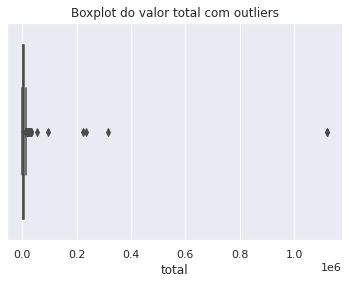

In [ ]:
# Localizando outliers por boxplot
sns.set()
sns.boxplot(x=df_houses.total)
plt.title("Boxplot do valor total com outliers")

No boxplot acima, utilizamos a coluna "total" como fonte dos dados. Neste caso, é perceptível que essa coluna possui vários outliers, uma vez que há pontos extremamente afastados do Intervalo Interquartil. Entretanto, apesar de podermos saber que há outliers, o uso do boxplot não nos permite saber quais são esses dados nem removê-los. Para isso, iremos usar o a Regra do Intervalo Interquartil.

Segundo [Morettin & Bussab, 2019], a Regra do Intervalo Interquartil é um método que nos permite encontrar valores aberrantes em nossa base de dados utilizando os valores definidos do primeiro quartil do terceiro quartil e do Intervalo Interquartil. Temos então:

**IQR** = Q3 - Q1

**lim_sup** = Q3 + 1.5 * IQR

**lim_inf** = Q1 - 1.5 * IQR

Ou seja, qualquer valor que esteja acima ou abaixo destes limites descritos acima pode ser considerado um valor aberrante (ou outlier) e pode ser removido.

Para aplicarmos essa regra, utilizaremos dois métodos que foram criados anteriormente: **get_IQR()**, responsável por encontrar o Intervalo Interquartil e **find_outlier_limit()**, responsável por usar o Intervalo Interquartil para achar os limites superiores e inferiores.

In [ ]:
def remove_outliers(df_data):
  iqr = get_IQR(df_data)
  total_inf, total_sup = find_outlier_limit(df_data, iqr)  
  return df_data[(df_data <= total_sup) & (df_data >= total_inf)]

In [ ]:
total_IQR = get_IQR(df_houses["total"])
total_inf, total_sup = find_outlier_limit(df_houses["total"], total_IQR)

no_out_houses = df_houses[(df_houses["total"] <= total_sup) & (df_houses["total"] >= total_inf) ]
no_out_houses

,city,area,rooms,bathroom,parkingSpaces,floor,animal,furniture,hoa,rentAmount,propertyTax,fireInsurance,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10685,São Paulo,83,3,2,2,11,acept,not furnished,888,7521,221,96,8726
10686,São Paulo,150,3,3,2,8,not acept,furnished,0,13500,0,172,13670
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24,22,1926
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332,78,7390


Agora que removemos os outliers, vamos gerar um novo boxplot para ver como nossos dados estão distribuidos. 

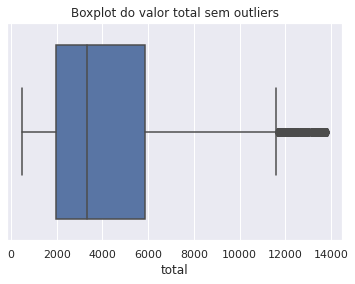

In [ ]:
sns.set()
sns.boxplot(x=no_out_houses.total)
plt.title("Boxplot do valor total sem outliers")
plt.show()

Agora, no novo boxplot, podemos ver que nossas variáveis estão bem menos dispersas. Isso garante que consigamos tirar melhor proveito destas informações.

Seguindo nessa lógica, vamos replicar o mesmo processo para as outras variáveis numéricas. Porém, antes de fazermos isso, iremos gerar series para cada coluna, o que nos permitirá organizar os dados de uma forma mais eficiente.

In [ ]:
sr_area = remove_outliers(df_houses["area"])
sr_rooms = remove_outliers(df_houses["rooms"])
sr_bathroom = remove_outliers(df_houses["bathroom"])
sr_parkingSpaces = remove_outliers(df_houses["parkingSpaces"])
sr_hoa = remove_outliers(df_houses["hoa"])
sr_rentAmount = remove_outliers(df_houses["rentAmount"])
sr_propertyTax = remove_outliers(df_houses["propertyTax"])
sr_fireInsurance = remove_outliers(df_houses["fireInsurance"])
sr_total = remove_outliers(df_houses["total"])

df_quant_var = pd.DataFrame(
    {
     'area': statistics(sr_area),
     'rooms': statistics(sr_rooms),
     'bathroom': statistics(sr_bathroom),
     'parkingSpaces': statistics(sr_parkingSpaces),
     'hoa': statistics(sr_hoa),
     'rentAmount': statistics(sr_rentAmount),
     'propertyTax': statistics(sr_propertyTax),
     'fireInsurance': statistics(sr_fireInsurance),
     'total': statistics(sr_total),
    }
)
df_quant_var

,area,rooms,bathroom,parkingSpaces,hoa,rentAmount,propertyTax,fireInsurance,total
média,116.06,2.39,2.19,1.44,693.10,3221.23,181.50,42.87,4340.06
mediana,85.00,2.00,2.00,1.00,500.00,2500.00,100.00,33.00,3330.00
moda,50.00,3.00,1.00,1.00,0.00,2500.00,0.00,16.00,2555.00
coef. de variação,71.42,42.36,60.40,89.56,99.72,71.28,113.62,70.79,70.93
simetria,1.17,0.06,1.02,0.85,1.11,1.22,1.46,1.22,1.16
curtosa,0.49,-1.11,0.18,0.03,0.50,0.74,1.45,0.74,0.53


Com a remoção dos outliers, nossas variáveis quantitativas passam a exibir valores mais homogêneos - sendo a variável **rooms** (quantidade de quartos) a mais homogênea (simetria de 0.06) , como pode ser visto abaixo:

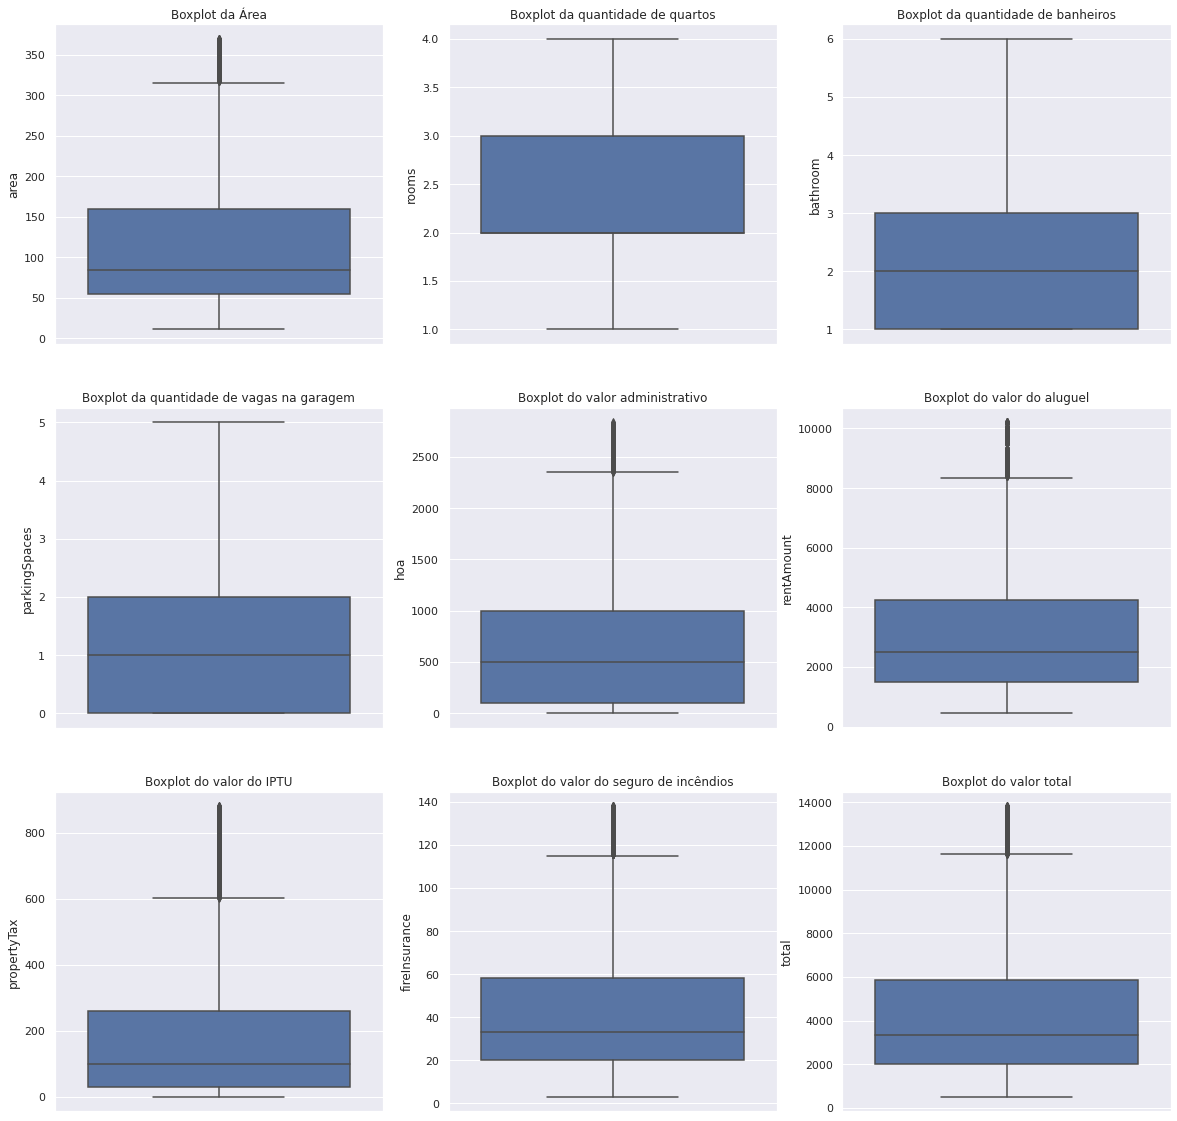

In [ ]:
# Visualização com boxplots
sns.set()
fig, ax = plt.subplots(3, 3, figsize=(20,20))
ax[0,0].set_title("Boxplot da Área")
sns.boxplot(y = sr_area, ax=ax[0,0])
ax[0,1].set_title("Boxplot da quantidade de quartos")
sns.boxplot(y = sr_rooms, ax=ax[0,1])
ax[0,2].set_title("Boxplot da quantidade de banheiros")
sns.boxplot(y = sr_bathroom, ax=ax[0,2])
ax[1,0].set_title("Boxplot da quantidade de vagas na garagem")
sns.boxplot(y = sr_parkingSpaces, ax=ax[1,0])
ax[1,1].set_title("Boxplot do valor administrativo")
sns.boxplot(y = sr_hoa, ax=ax[1,1])
ax[1,2].set_title("Boxplot do valor do aluguel")
sns.boxplot(y = sr_rentAmount, ax=ax[1,2])
ax[2,0].set_title("Boxplot do valor do IPTU")
sns.boxplot(y = sr_propertyTax, ax=ax[2,0])
ax[2,1].set_title("Boxplot do valor do seguro de incêndios")
sns.boxplot(y = sr_fireInsurance, ax=ax[2,1])
ax[2,2].set_title("Boxplot do valor total")
sns.boxplot(y = sr_total, ax=ax[2,2])
plt.show()

Uma outra forma interessante de visualizarmos nossos dados é através de gráficos que se utilizam da Estimativa de densidade kernel. Abaixo, temos nossas variáveis quantitativas exibidas nesse formato:

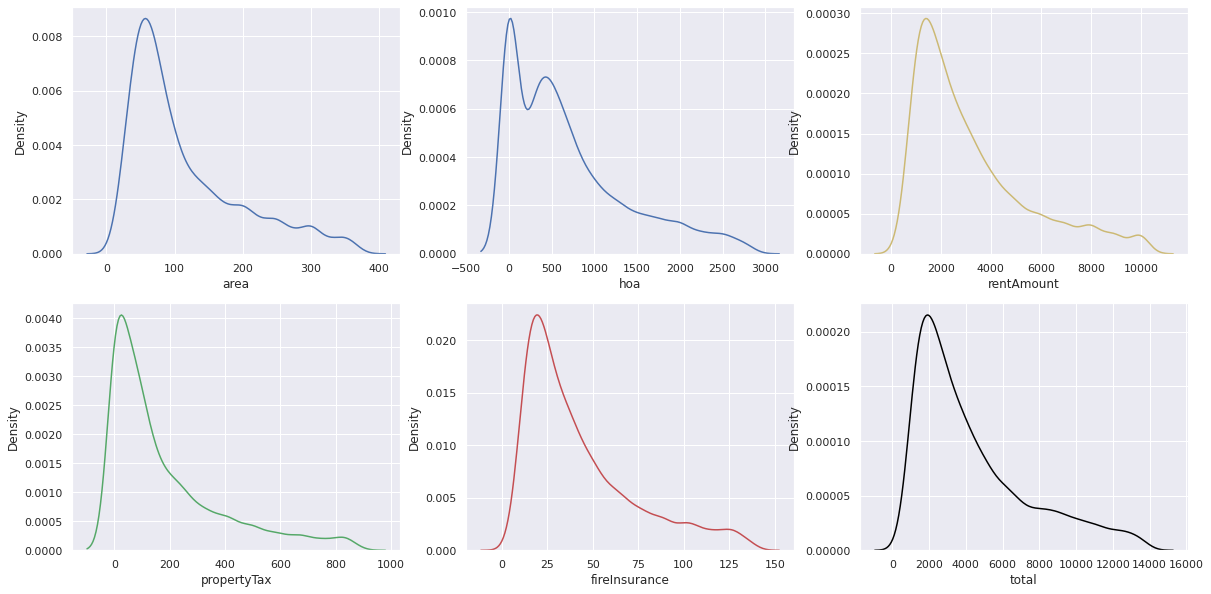

In [ ]:
# Visualização com kdeplots
sns.set()
fig, ax = plt.subplots(2, 3, figsize=(20,10))
sns.kdeplot(sr_area, ax=ax[0,0], color='b')
sns.kdeplot(sr_hoa, ax=ax[0,1])
sns.kdeplot(sr_rentAmount, ax=ax[0, 2], color = 'y')
sns.kdeplot(sr_propertyTax, ax=ax[1, 0], color = 'g')
sns.kdeplot(sr_fireInsurance, ax=ax[1, 1], color = 'r')
sns.kdeplot(sr_total, ax=ax[1, 2], color = 'black')

plt.show()

O interessante dessa visualização é que ela nos permite perceber que nossas variáveis possuem, em sua totalidade, curvas assimétricas positivas.

Outra informação interessante de ser avaliada agora que verificamos a assimetria dos nossos dados, é que tipo de curtose nossos dados possuem.
Faremos isso utilizando novamente o dataframe de estatística que geramos acima:

In [ ]:
def curtose_curva(curt):
  if curt == 0.263:
    return "mesocúrtica"
  elif curt > 0.263:
    return "platicúrtica"
  else:
    return "leptocúrtica"

# df_quant_var["total"]

dict_curtose = {coluna: {"curtose": 0, "curva": "" } for coluna in colunas_numericas}
# dict_curtose.get("total")

for coluna in colunas_numericas:
  dict_curtose.get(coluna)["curtose"] = df_quant_var["{}".format(coluna)].loc['curtosa']
  dict_curtose.get(coluna)["curva"] = curtose_curva(dict_curtose.get(coluna)["curtose"])

df_curtose = pd.DataFrame(dict_curtose)
df_curtose.T

# sr_curtose = df_quant_var.loc['curtosa']
# df_curtose = pd.DataFrame({coluna: {"curtose": curt, "curva": curtose_curva(curt)} for coluna in colunas_numericas for curt in sr_curtose})
# df_curtose.T
# print("{}\tcurtose: {}\tcurva: {}".format((var for var in colunas_numericas), (curt for curt in df_quant_var.loc['curtosa']), (curtose_curva(curt) for curt in df_quant_var.loc['curtosa'])))

,curtose,curva
area,0.49,platicúrtica
rooms,-1.11,leptocúrtica
bathroom,0.18,leptocúrtica
parkingSpaces,0.03,leptocúrtica
hoa,0.5,platicúrtica
rentAmount,0.74,platicúrtica
propertyTax,1.45,platicúrtica
fireInsurance,0.74,platicúrtica
total,0.53,platicúrtica


Todas as informações observadas anteriormente foram retiradas de uma amostra, uma vez que isso não representa 100% de todas as casas alugáveis destes locais. Porém, por essa amostra - dadas condições como o lugar em que foram obtidos os dados, por exemplo - é possível estimar valores relacionados à população. Isso pode ser realizado por meio do intervalo de confiança.

In [ ]:
def get_ic(x):
  inf,sup = stats.t.interval(0.95, len(x)-1, loc=st.mean(x), scale=st.stdev(x)/np.sqrt(len(x)))
  return {'limite inferior': round(inf,2), 'média': round(st.mean(x),2),  'limite superior': round(sup,2)}

In [ ]:
measures = {
  'area': sr_area,
  'rooms': sr_rooms,
  'bathroom': sr_bathroom,
  'parkingSpaces': sr_parkingSpaces,
  'hoa': sr_hoa,
  'rentAmount': sr_rentAmount,
  'propertyTax': sr_propertyTax,
  'fireInsurance': sr_fireInsurance,
  'total': sr_total,
}

ic_dict = {
    k: get_ic(measures[k]) for k in measures.keys()
}
df_ic = pd.DataFrame(ic_dict)
df_ic

,area,rooms,bathroom,parkingSpaces,hoa,rentAmount,propertyTax,fireInsurance,total
limite inferior,114.44,2.37,2.16,1.42,679.54,3176.17,177.38,42.27,4279.68
média,116.06,2.39,2.19,1.44,693.10,3221.23,181.50,42.87,4340.06
limite superior,117.69,2.41,2.21,1.47,706.67,3266.29,185.63,43.47,4400.45


A tabela acima apresenta uma estimativa de valores intervalares que permeiam a média - limite inferior e o limite superior representam o intervalo em que o valor da variável pode estar, calculado com base nessa amostra e que pode ser estimada para a população. Ou seja, a área de uma casa (na região onde foi coletada este dado), por exemplo, poderá estar entre 114,44 e 117,69 m². Tendo em vista um intervalo de confiança de 95%, a taxa de erro é 5%. Portanto, há 5% de chances de o valor não estar nesse intervalo.

In [ ]:
no_out_houses.groupby('animal').agg({'rentAmount':['describe']})

rentAmount                            ...                         
            describe                            ...                         
               count         mean          std  ...     50%     75%      max
animal                                          ...                         
acept         7741.0  3354.545795  2431.877343  ...  2500.0  4500.0  13040.0
not acept     2245.0  2950.244098  2257.752537  ...  2200.0  3800.0  13500.0

[2 rows x 8 columns]

In [ ]:
no_out_houses.groupby('furniture').agg({'rentAmount':['describe']})

rentAmount                            ...                         
                describe                            ...                         
                   count         mean          std  ...     50%     75%      max
furniture                                           ...                         
furnished         2362.0  4043.671465  2501.679419  ...  3300.0  5500.0  13500.0
not furnished     7624.0  3021.994360  2314.600851  ...  2200.0  4000.0  13040.0

[2 rows x 8 columns]

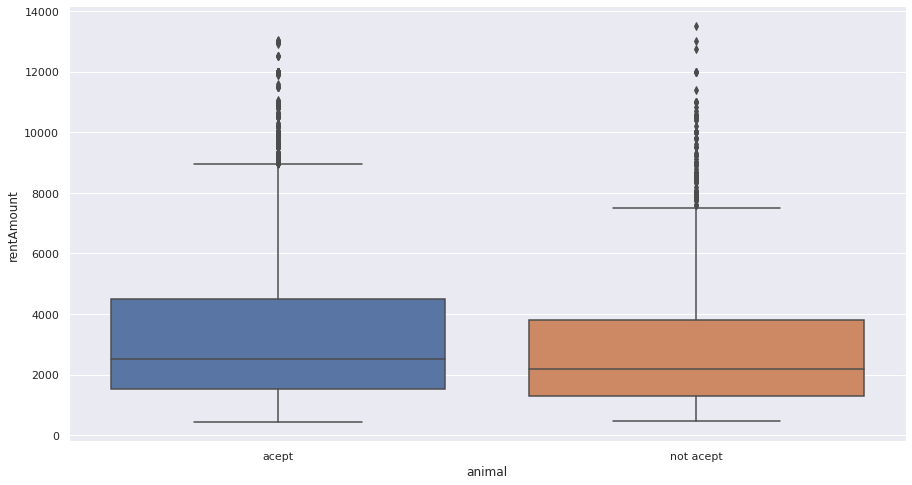

In [ ]:
# floor_ordered = no_out_houses.floor.unique()
# floor_ordered.sort()
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="animal", y = "rentAmount", data = no_out_houses)
# ax.set_xlabel('Andar')
# ax.set_ylabel('Valor do Aluguel')
# ax.set_title("Valor do aluguel por andar")
plt.show()

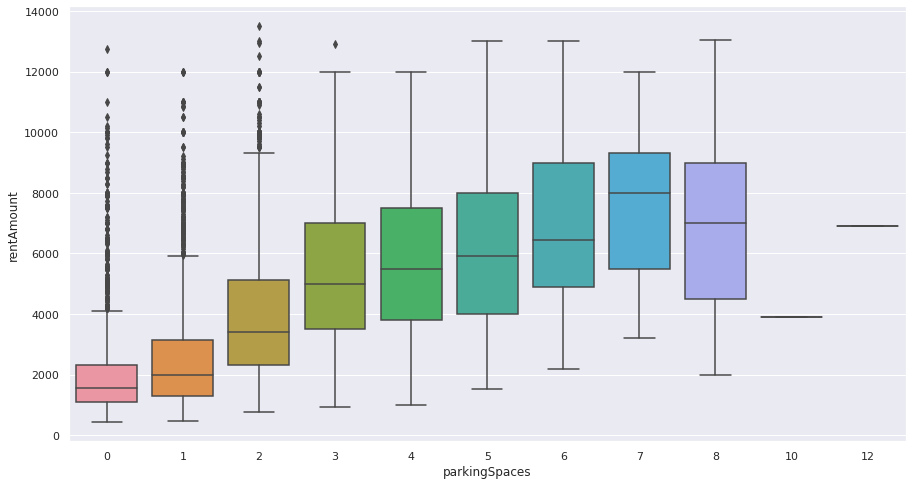

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="parkingSpaces", y = "rentAmount", data = no_out_houses)
plt.show()

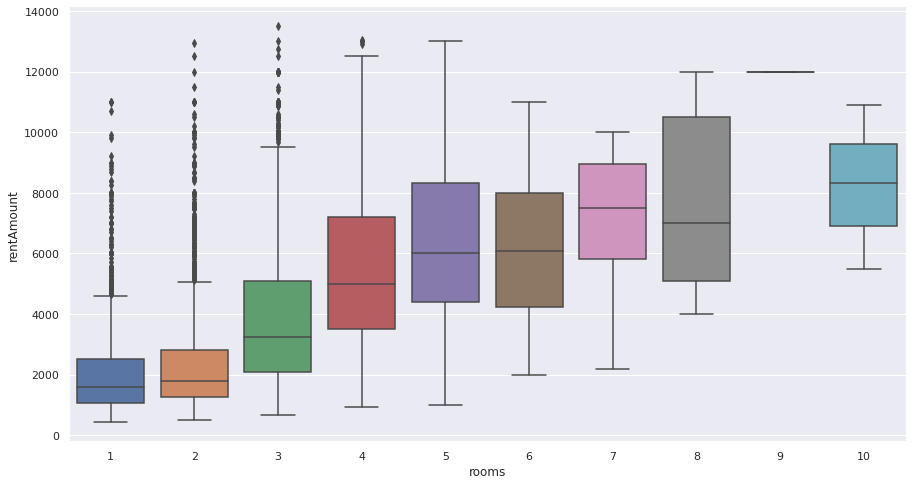

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="rooms", y = "rentAmount", data = no_out_houses)
plt.show()

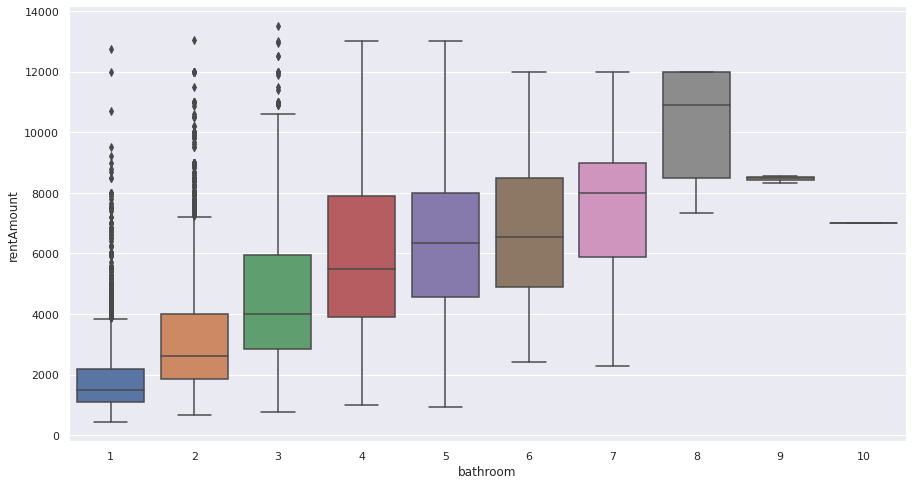

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="bathroom", y = "rentAmount", data = no_out_houses)
plt.show()

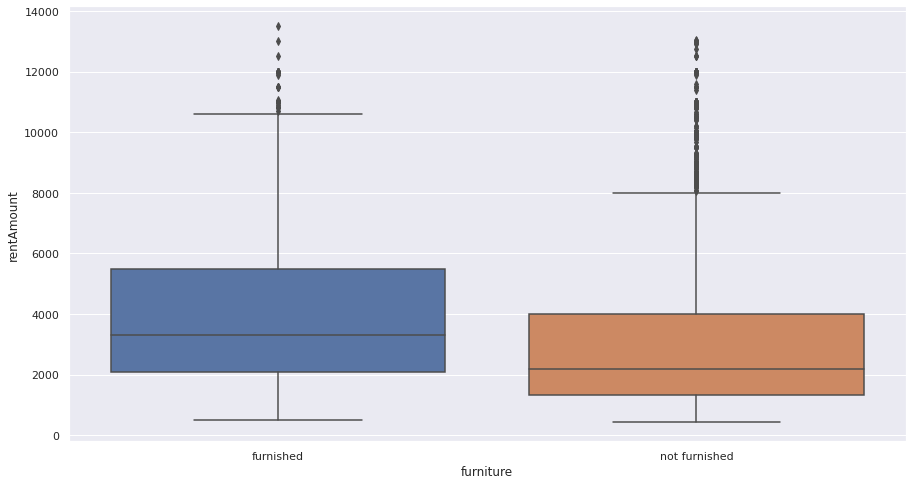

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="furniture", y = "rentAmount", data = no_out_houses)
plt.show()

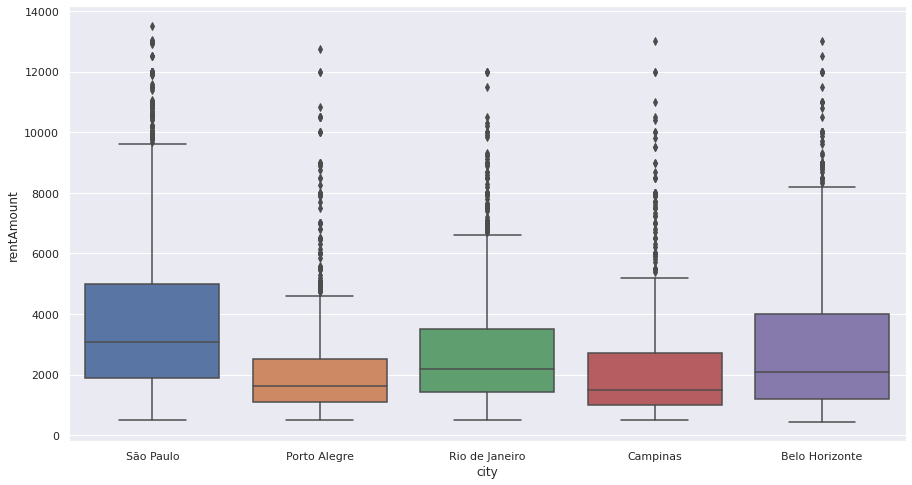

In [ ]:
plt.figure(figsize=(15, 8))
ax = sns.boxplot(x="city", y = "rentAmount", data = no_out_houses)
plt.show()

## Teste de Hipótese

Agora que temos uma compreensão melhor dos nossos dados, uma atiivdade que pode ser feita é realizar testes de hipóteses sobre algumas variáveis, de modo a conseguir verificar possíveis correlações entre as mesmas.

Dessa forma, faremos dois testes: a) entre uma variável numérica e uma categórica e b) entre duas variáveis categóricas.

### a) city <-> rentAmount

Primeiramente, precisamos definir nossas hipóteses. Neste caso, trabalharemos com as hipóteses abaixo:

h0: A média do aluguel de casas em São Paulo é de 3820.

h1: A média do aluguel de casas em São Paulo é diferente de 3820.

In [ ]:
from scipy.stats import binom, ttest_1samp, ttest_ind, chi2_contingency

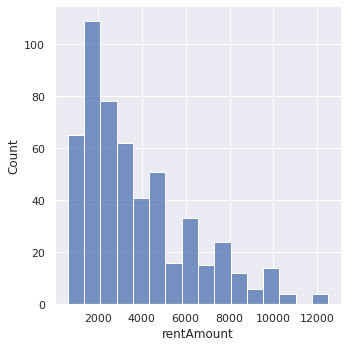

In [ ]:
df_sao_paulo = no_out_houses.loc[no_out_houses["city"] == "São Paulo"]
media_aluguel = df_sao_paulo.rentAmount.mean()
media_aluguel

x = df_sao_paulo.rentAmount.sample(frac=0.10)
sns.displot(x)

In [ ]:
Mo = 3820
alfa = 0.05
media = np.mean(x)
print("media: {}".format(media))
dp = np.std(x)
print("desvio padrao: {}".format(dp))
t, po = ttest_1samp(x, Mo)
p = 2*po

print('t= %0.3f, p= %0.3f' % (t, p))
if p == alfa:
   print ("Conclusão: aceita-se Ho, ou seja, a média é estatisticamente igual a 3820 ao nível de 5% de significância")
else:
   print ("Conclusão: Rejeita-se Ho, ou seja, a média é estatisticamente menor que 3820 ao nível de 5% de significância")

media: 3804.449438202247
desvio padrao: 2512.4655251831336
t= -0.143, p= 1.773
Conclusão: Rejeita-se Ho, ou seja, a média é estatisticamente menor que 3820 ao nível de 5% de significância


### b) city <-> room

h0: São Paulo e Belo Horizonte tem número médio de quartos estatisticamente iguais

h1: São Paulo e Belo Horizonte tem número médio de quartos estatisticamente diferentes

In [ ]:
df_sp = no_out_houses.loc[no_out_houses.city == "São Paulo"]
df_bh = no_out_houses.loc[no_out_houses.city == "Belo Horizonte"]
print("São Paulo:",df_sp.shape)
print("Belo Horizonte:",df_bh.shape)

São Paulo: (5339, 13)
Belo Horizonte: (1185, 13)


In [ ]:
alfa=0.05
média = np.mean(df_sp.rooms)
dp = np.std(df_sp.rooms)
print("Média São Paulo =",round(média,2))
print("Desvio-padrão São Paulo =",round(dp,2))
média = np.mean(df_bh.rooms)
dp = np.std(df_bh.rooms)
print("Média Belo Horizonte =",round(média,2))
print("Desvio-padrão Belo Horizonte =",round(dp,2))
t,p = ttest_ind(df_sp.rooms,df_bh.rooms)
print('t= %0.3f, p= %0.3f' % (t, p))
if p > alfa:
   print ("Conclusão: aceita-se Ho, ou seja, as médias são estatisticamente iguais ao nível de significância de 5%")
else:
   print ("Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%") 

Média São Paulo = 2.44
Desvio-padrão São Paulo = 1.13
Média Belo Horizonte = 2.94
Desvio-padrão Belo Horizonte = 1.24
t= -13.604, p= 0.000
Conclusão: rejeita-se Ho, ou seja, as médias são estatisticamente diferentes ao nível de significância de 5%


# Extra

Qual cidade com maior valor de aluguel?

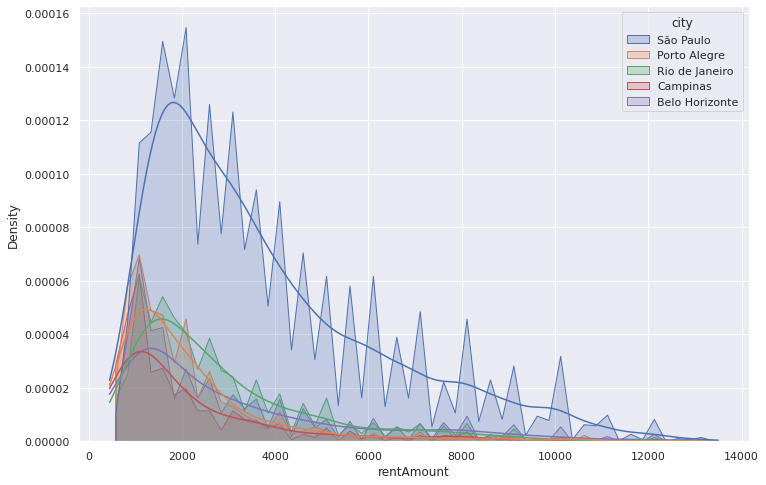

In [ ]:
sns.set()
plt.figure(figsize=(12,8))
sns.histplot(no_out_houses, x="rentAmount", hue="city", kde=True, stat="density", element='poly')
plt.show()

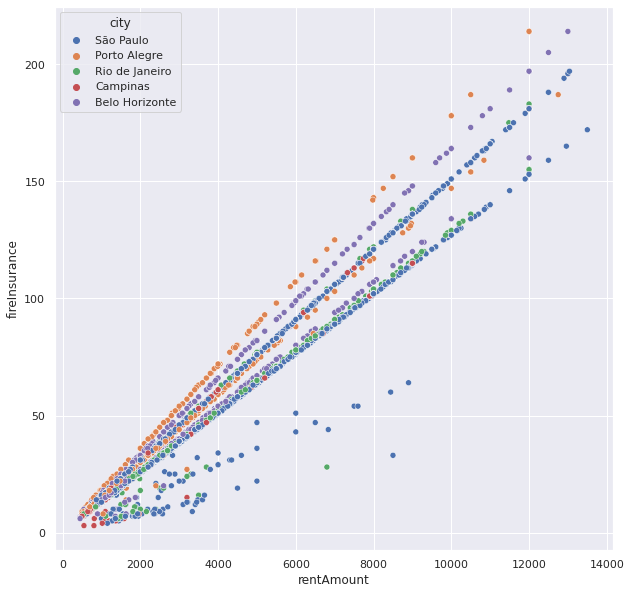

In [ ]:
# Correlações
sns.set()
plt.figure(figsize=(10, 10))
#sns.scatterplot(data = df_houses, x="hoa", y="total")
sns.scatterplot(data = no_out_houses, x="rentAmount", y="fireInsurance", hue='city')
# plt.xlim((0, 5000))
# plt.ylim((0, 100))
plt.show()

In [ ]:
fields = ['hoa', 'rentAmount','propertyTax','fireInsurance','total']
correlacao = no_out_houses[fields].corr()
correlacao

,hoa,rentAmount,propertyTax,fireInsurance,total
hoa,1.000000,0.335100,0.454052,0.237313,0.600872
rentAmount,0.335100,1.000000,0.507458,0.983966,0.948292
propertyTax,0.454052,0.507458,1.000000,0.496598,0.654316
fireInsurance,0.237313,0.983966,0.496598,1.000000,0.907246
total,0.600872,0.948292,0.654316,0.907246,1.000000


In [ ]:
def gen_coor_matrix(correlacao):
  mask = np.triu(np.ones_like(correlacao, dtype=bool))
  
  f, ax = plt.subplots(figsize=(11, 9))
  ax.set_title('Matriz de Correlação entre as Valores Monetários')

  cmap = sns.diverging_palette(230, 20, as_cmap=True)

  sns.heatmap(correlacao, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

  plt.show()

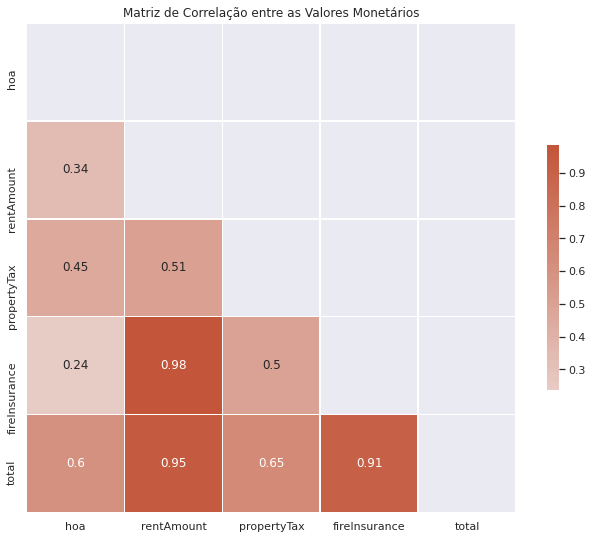

In [ ]:
sns.set()
#sns.heatmap(correlacao, cmap="Blues", center=0, annot=True)
gen_coor_matrix(correlacao)
plt.show()